In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

## Read data

In [2]:
## read data
def readdata(path):
    """
    Read the data and show the basic info
    
    Input: path of the data file
    
    """
    tempcp1=pd.read_csv(path)
    del tempcp1['Unnamed: 0']
    
    print(tempcp1.shape)
    
    return tempcp1

In [3]:
M1PV=readdata('M1PV.csv')
M1PV.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.999999,0.91,185088.823220,167819.761232,175849.033390
1,"1,3 &1,7 DMN",52.499999,1.81,183667.870385,147907.890008,179054.575332
2,"1,3,6-TMN",59.199999,1.75,129800.060753,84475.877129,87036.712407
3,"1,3,7-TMN",58.899999,1.74,106621.233565,77114.058857,73071.014487
4,"1,4,6&1,3,5-TMN",60.099999,1.83,54141.360133,55969.873792,58692.278751


In [4]:
M2PV=readdata('M2PV.csv')
M2PV.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.899999,0.91,179944.453289,167819.761232,175849.033390
1,"1,3 &1,7 DMN",52.399999,1.79,129461.468389,147907.890008,179054.575332
2,"1,3,6-TMN",58.699999,1.76,111970.842119,84475.877129,87036.712407
3,"1,3,7-TMN",58.999999,1.74,118211.903753,77114.058857,73071.014487
4,"1,4,6&1,3,5-TMN",59.899999,1.84,71568.973435,55969.873792,58692.278751


In [5]:
M3PV=readdata('M3PV.csv')
M3PV.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.899999,0.91,112407.671449,167819.761232,175849.033390
1,"1,3 &1,7 DMN",52.299999,1.79,175218.509226,147907.890008,179054.575332
2,"1,3,6-TMN",58.999999,1.75,119128.627076,84475.877129,87036.712407
3,"1,3,7-TMN",58.699999,1.74,89538.338123,77114.058857,73071.014487
4,"1,4,6&1,3,5-TMN",59.899999,1.82,43140.699547,55969.873792,58692.278751


In [6]:
M1V=readdata('M1V.csv')
M1V.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.999999,0.91,1.250369e+06,1.158441e+06,1.220085e+06
1,"1,3 &1,7 DMN",52.499999,1.81,1.808672e+06,1.943806e+06,1.867825e+06
2,"1,3,6-TMN",59.199999,1.75,1.144294e+06,1.155635e+06,1.179569e+06
3,"1,3,7-TMN",58.899999,1.74,9.422694e+05,9.284217e+05,9.175154e+05
4,"1,4,6&1,3,5-TMN",60.099999,1.83,7.115688e+05,6.272748e+05,6.665838e+05


In [7]:
M2V=readdata('M2V.csv')
M2V.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.899999,0.91,1.297604e+06,1.158441e+06,1.220085e+06
1,"1,3 &1,7 DMN",52.399999,1.79,2.424594e+06,1.943806e+06,1.867825e+06
2,"1,3,6-TMN",58.699999,1.76,1.006793e+06,1.155635e+06,1.179569e+06
3,"1,3,7-TMN",58.999999,1.74,1.235502e+06,9.284217e+05,9.175154e+05
4,"1,4,6&1,3,5-TMN",59.899999,1.84,7.415192e+05,6.272748e+05,6.665838e+05


In [8]:
M3V=readdata('M3V.csv')
M3V.head()

(3000, 6)


,CN,RI,RII,MV,C1,C2
0,"1,2DEB",30.899999,0.91,1.237998e+06,1.158441e+06,1.220085e+06
1,"1,3 &1,7 DMN",52.299999,1.79,1.927023e+06,1.943806e+06,1.867825e+06
2,"1,3,6-TMN",58.999999,1.75,1.149723e+06,1.155635e+06,1.179569e+06
3,"1,3,7-TMN",58.699999,1.74,9.388812e+05,9.284217e+05,9.175154e+05
4,"1,4,6&1,3,5-TMN",59.899999,1.82,7.291452e+05,6.272748e+05,6.665838e+05


In [23]:
def identify6(df, nrow):
    """
    Identify the ratio of the two materials
    Input:  df is the merged dataframe
            nrow is the number of the features we use for the calculation
    
    Return the ratio
    
    """
    b=df.MV[:nrow]
    
    A=np.array(df[['C1','C2']])[:nrow]
    
    def obj(x):
        y=np.dot(A,x)-b
        return np.dot(y,y)
    
    bond=(0.0, 5.0)
    bnds=(bond,bond)
    
    #cons = ({'type': 'eq', 'fun': lambda x: x.sum() - 1})
    #cons = ({'type': 'eq', 'fun': x > 0})
    
    #res = optimize.minimize(obj, [0, 0], method='SLSQP', constraints=cons, options={'disp': False})
    #res = optimize.minimize(obj, [0, 0], method='SLSQP', bounds=bnds, options={'disp': False})
    res = optimize.minimize(obj, [0.5, 0.5], method='SLSQP', options={'disp': False})
    
    return res

In [21]:
def plotratio(df, nf):
    """
    Plot the ratio against the number of features
    Input:  df is the merged dataframe
            nf is total number of features
    
    """
    
    rownum=[]
    res=[]

    for i in range(5, nf, 5):
        rownum.append(i)
        tempres=identify6(df,i)
        res.append(tempres.x[0])
        
    
    plt.plot(rownum, res);
    plt.xlabel('Number of Features');
    plt.ylabel('Ratio of material 1');
    plt.title('Ratio vs. Number of Features');
    plt.show()
    
    
    return rownum, res

## Ratio Plot

In [35]:
## Peak Value Mixed 1

(3000, 6)


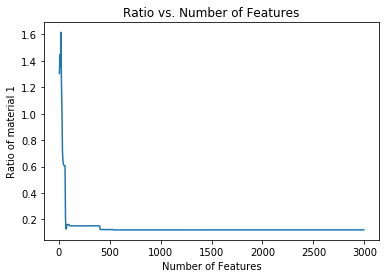

In [24]:
print(M1PV.shape)
rn1, r1=plotratio(M1PV, 3000)

In [25]:
M1PVn=M1PV
M1PVn=M1PVn.replace(0, np.nan)
M1PVn=M1PVn.dropna(subset=['C1','C2'])
print(M1PVn.shape)

(2868, 6)


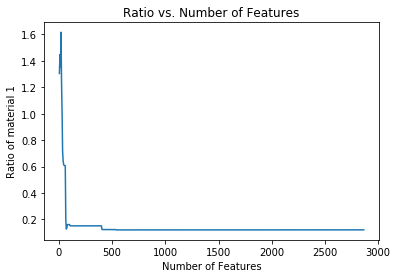

In [26]:
rn1n, r1n=plotratio(M1PVn, 2868)

In [37]:
## Peak Value Mixed 2

(3000, 6)


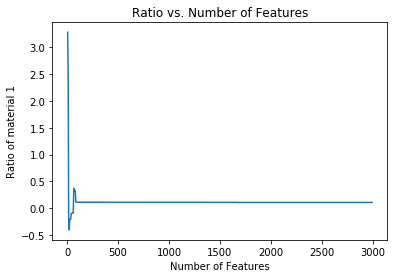

In [27]:
print(M2PV.shape)
rn2, r2=plotratio(M2PV, 3000)

In [39]:
M2PVn=M2PV
M2PVn=M2PVn.replace(0, np.nan)
M2PVn=M2PVn.dropna(subset=['C1','C2'])
print(M2PVn.shape)

(2871, 6)


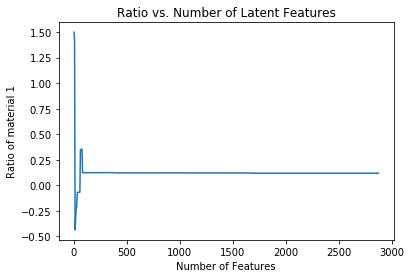

In [40]:
rn2n, r2n=plotratio(M2PVn, 2871)

In [42]:
## Peak Value Mixed 3

(3000, 6)


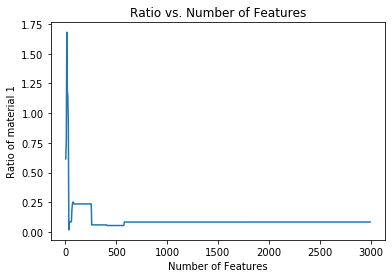

In [43]:
print(M3PV.shape)
rn3, r3=plotratio(M3PV, 3000)

In [44]:
M3PVn=M3PV
M3PVn=M3PVn.replace(0, np.nan)
M3PVn=M3PVn.dropna(subset=['C1','C2'])
print(M3PVn.shape)

(2815, 6)


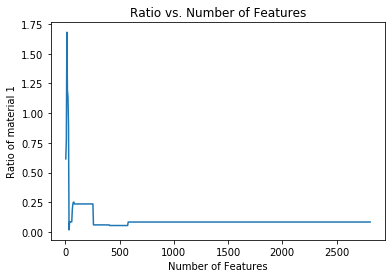

In [45]:
rn3n, r3n=plotratio(M3PVn, 2815)

(3000, 6)


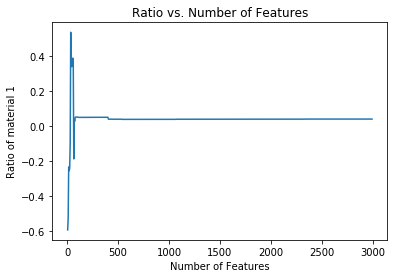

In [46]:
## Volume Mixed 1
print(M1V.shape)
Vrn1, Vr1=plotratio(M1V, 3000)

(3000, 6)


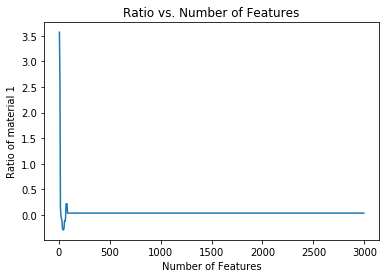

In [47]:
## Volume Mixed 2
print(M2V.shape)
Vrn2, Vr2=plotratio(M2V, 3000)

(3000, 6)


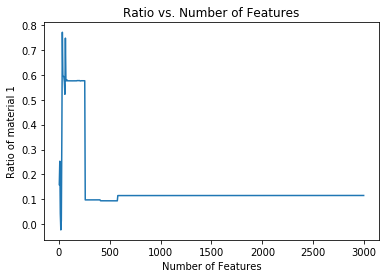

In [48]:
## Volume Mixed 3
print(M3V.shape)
Vrn3, Vr3=plotratio(M3V, 3000)